<a href="https://colab.research.google.com/github/Paymanshus/ML-Sem-V/blob/master/ML_J046_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aim: Classification using Neural network models

# Objectives:

1.   Perform classification on given dataset
2.   Tackle Null values, Correct mismatched data types, plot correlation matrix as heatmap and preprocessing as needed
3.   Select correct architecture for maximum accuracy on cross validation and test set
4.   Plot accuracy vs validation acc and loss vs validation loss during epochs
5.   List hyper-parameters used and callbacks


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets

In [3]:
kd_X_arr, kd_y_arr = datasets.fetch_kddcup99(return_X_y=True)
cov_X_arr, cov_y_arr = datasets.fetch_covtype(return_X_y=True)
br_X_arr, br_y_arr = datasets.load_breast_cancer(return_X_y=True)
wine_X_arr, wine_y_arr = datasets.load_wine(return_X_y=True)

In [60]:
# kd_arr = datasets.fetch_kddcup99()
# cov_arr = datasets.fetch_covtype()
# br_arr = datasets.load_breast_cancer()
# wine_arr = datasets.load_wine()

# Working with kddcup99

In [61]:
kd_X = pd.DataFrame(kd_X_arr)
kd_y = pd.DataFrame(kd_y_arr)

In [62]:
kd_X.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28    object
29    object
30    object
31    object
32    object
33    object
34    object
35    object
36    object
37    object
38    object
39    object
40    object
dtype: object

In [63]:
kd_X = kd_X.convert_dtypes()

In [64]:
kd_X.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
dtype: int64

In [65]:
kd_X.dtypes

0       Int64
1      object
2      object
3      object
4       Int64
5       Int64
6       Int64
7       Int64
8       Int64
9       Int64
10      Int64
11      Int64
12      Int64
13      Int64
14      Int64
15      Int64
16      Int64
17      Int64
18      Int64
19      Int64
20      Int64
21      Int64
22      Int64
23      Int64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31      Int64
32      Int64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
dtype: object

In [66]:
kd_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [67]:
kd_y.head()

,0
0,b'normal.'
1,b'normal.'
2,b'normal.'
3,b'normal.'
4,b'normal.'


In [68]:
# kd_X[1].str.decode('utf-8')

In [69]:
kd_X.shape

(494021, 41)

In [70]:
kd_X[0].value_counts()

0        481671
1          2476
2           870
3           625
5           554
          ...  
4554          1
2249          1
200           1
18383         1
7755          1
Name: 0, Length: 2495, dtype: Int64

In [71]:
kd_y.value_counts()

b'smurf.'              280790
b'neptune.'            107201
b'normal.'              97278
b'back.'                 2203
b'satan.'                1589
b'ipsweep.'              1247
b'portsweep.'            1040
b'warezclient.'          1020
b'teardrop.'              979
b'pod.'                   264
b'nmap.'                  231
b'guess_passwd.'           53
b'buffer_overflow.'        30
b'land.'                   21
b'warezmaster.'            20
b'imap.'                   12
b'rootkit.'                10
b'loadmodule.'              9
b'ftp_write.'               8
b'multihop.'                7
b'phf.'                     4
b'perl.'                    3
b'spy.'                     2
dtype: int64

In [72]:
np.unique(kd_y_arr)

array([b'back.', b'buffer_overflow.', b'ftp_write.', b'guess_passwd.',
       b'imap.', b'ipsweep.', b'land.', b'loadmodule.', b'multihop.',
       b'neptune.', b'nmap.', b'normal.', b'perl.', b'phf.', b'pod.',
       b'portsweep.', b'rootkit.', b'satan.', b'smurf.', b'spy.',
       b'teardrop.', b'warezclient.', b'warezmaster.'], dtype=object)

In [73]:
# attacks_types = {
# 'normal': 'normal',
# 'back': 'dos',
# 'buffer_overflow': 'u2r',
# 'ftp_write': 'r2l',
# 'guess_passwd': 'r2l',
# 'imap': 'r2l',
# 'ipsweep': 'probe',
# 'land': 'dos',
# 'loadmodule': 'u2r',
# 'multihop': 'r2l',
# 'neptune': 'dos',
# 'nmap': 'probe',
# 'perl': 'u2r',
# 'phf': 'r2l',
# 'pod': 'dos',
# 'portsweep': 'probe',
# 'rootkit': 'u2r',
# 'satan': 'probe',
# 'smurf': 'dos',
# 'spy': 'r2l',
# 'teardrop': 'dos',
# 'warezclient': 'r2l',
# 'warezmaster': 'r2l',
# }

In [74]:
kd_X.select_dtypes('object')

,1,2,3
0,b'tcp',b'http',b'SF'
1,b'tcp',b'http',b'SF'
2,b'tcp',b'http',b'SF'
3,b'tcp',b'http',b'SF'
4,b'tcp',b'http',b'SF'
...,...,...,...
494016,b'tcp',b'http',b'SF'
494017,b'tcp',b'http',b'SF'
494018,b'tcp',b'http',b'SF'
494019,b'tcp',b'http',b'SF'


In [75]:
kd_X[1].value_counts()

b'icmp'    283602
b'tcp'     190065
b'udp'      20354
Name: 1, dtype: int64

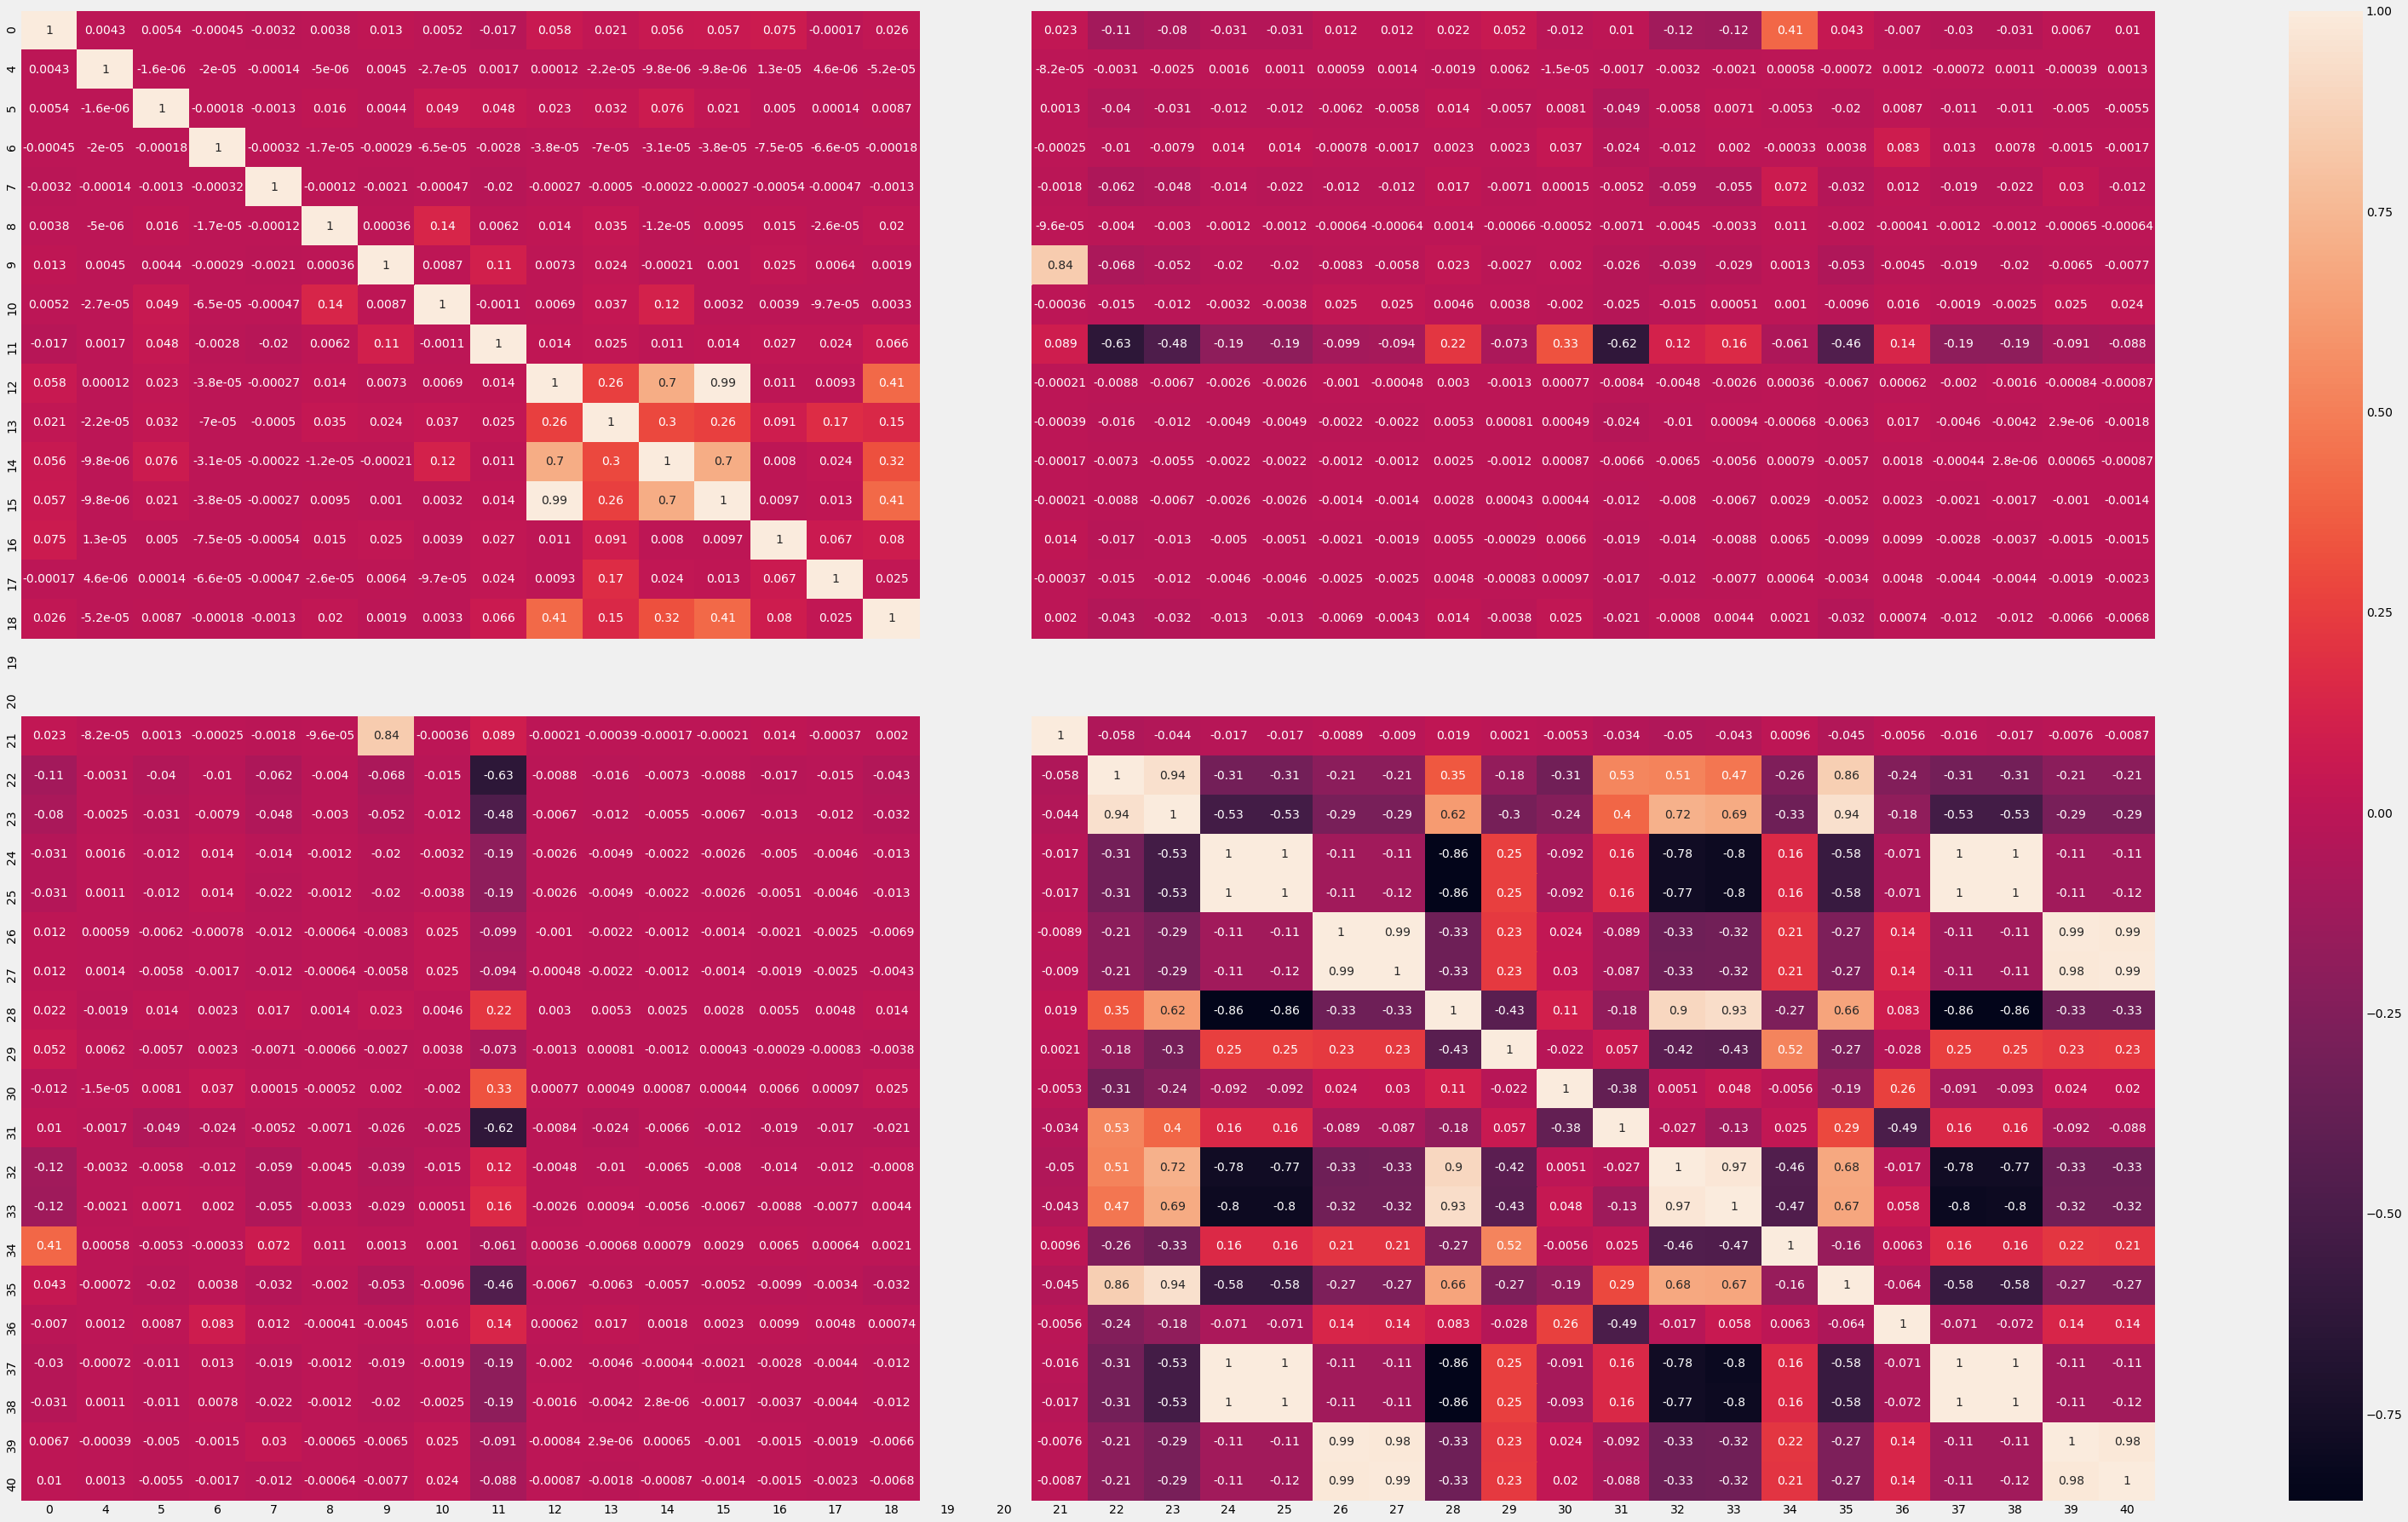

In [76]:
plt.figure(figsize=(50,30))
sns.heatmap(kd_X.select_dtypes(exclude='object').corr(), annot=True)

In [77]:
kd_X = pd.get_dummies(kd_X, columns=kd_X.iloc[:,1:4].columns)
kd_X

,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1_b'icmp',1_b'tcp',...,2_b'nnsp',2_b'nntp',2_b'ntp_u',2_b'other',2_b'pm_dump',2_b'pop_2',2_b'pop_3',2_b'printer',2_b'private',2_b'red_i',2_b'remote_job',2_b'rje',2_b'shell',2_b'smtp',2_b'sql_net',2_b'ssh',2_b'sunrpc',2_b'supdup',2_b'systat',2_b'telnet',2_b'tftp_u',2_b'tim_i',2_b'time',2_b'urh_i',2_b'urp_i',2_b'uucp',2_b'uucp_path',2_b'vmnet',2_b'whois',3_b'OTH',3_b'REJ',3_b'RSTO',3_b'RSTOS0',3_b'RSTR',3_b'S0',3_b'S1',3_b'S2',3_b'S3',3_b'SF',3_b'SH'
0,0,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,9,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,310,1881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,5,0.00,0.00,0.0,0.0,1.0,0.0,0.40,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
494017,0,282,2286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
494018,0,203,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,18,0.17,0.11,0.0,0.0,1.0,0.0,0.17,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
494019,0,291,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,12,0.00,0.00,0.0,0.0,1.0,0.0,0.17,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [79]:
sc = StandardScaler()
kd_X = sc.fit_transform(kd_X)

In [80]:
kd_y = pd.get_dummies(kd_y)
kd_y.shape

(494021, 23)

In [81]:
kd_X_train, kd_X_test, kd_y_train, kd_y_test = train_test_split(kd_X, kd_y, test_size=0.3, random_state=42)

In [82]:
print(kd_X_train.shape, kd_X_test.shape)
print(kd_y_train.shape, kd_y_test.shape)

(345814, 118) (148207, 118)
(345814, 23) (148207, 23)


## Model Building

In [5]:
from keras import layers
from keras import models
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

In [84]:
nn = models.Sequential()

nn.add(layers.Dense(118, activation='relu', input_shape=(118,)))
nn.add(layers.Dense(64, activation='relu'))
nn.add(layers.Dense(23, activation='softmax'))

In [85]:
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 118)               14042     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                7616      
_________________________________________________________________
dense_8 (Dense)              (None, 23)                1495      
Total params: 23,153
Trainable params: 23,153
Non-trainable params: 0
_________________________________________________________________


In [86]:
nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping('val_loss', mode='min', verbose=0, patience=150)
check = ModelCheckpoint('check.hdf5', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
callbacks = [es,check]

In [87]:
# results = nn.fit(kd_X_train, kd_y_train, validation_data=(kd_X_test, kd_y_test), epochs=10, batch_size=100, callbacks=callbacks, verbose=0)

In [88]:
scores = nn.evaluate(kd_X_test, kd_y_test)
scores

4632/4632 [==============================] - 4s 898us/step - loss: 3.2582 - accuracy: 0.0029


[3.2582201957702637, 0.0028946001548320055]

### Plotting Learning Curves

In [6]:
plt.style.use('fivethirtyeight')

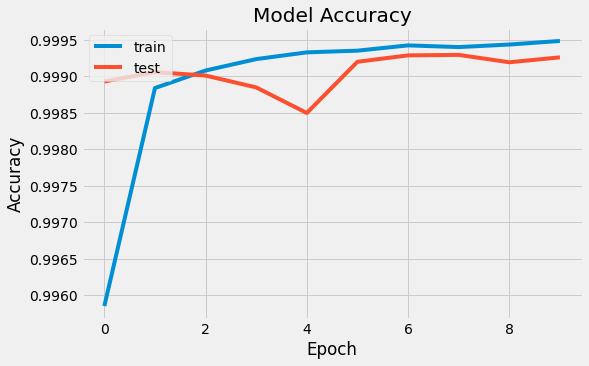

In [90]:
plt.figure(figsize=(8,5))
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Working with covtype

In [7]:
cov_X = pd.DataFrame(cov_X_arr)
cov_y = pd.DataFrame(cov_y_arr)

In [8]:
cov_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
cov_y.head()

,0
0,5
1,5
2,2
3,2
4,5


In [10]:
cov_X[13].value_counts()

0.0    544044
1.0     36968
Name: 13, dtype: int64

In [11]:
cov_X.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
dtype: object

In [12]:
cov_X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3858.000000,360.000000,66.000000,1397

In [13]:
cov_X.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
dtype: int64

In [14]:
cov_y = cov_y.replace([1,2,3,4,5,6,7], [0,1,2,3,4,5,6])
cov_y

,0
0,4
1,4
2,1
3,1
4,4
...,...
581007,2
581008,2
581009,2
581010,2


In [15]:
cov_y = to_categorical(cov_y)
cov_y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [16]:
cov_X_train, cov_X_test, cov_y_train, cov_y_test = train_test_split(cov_X, cov_y, test_size=0.3, random_state=42)

In [17]:
print(cov_X_train.shape, cov_X_test.shape)
print(cov_y_train.shape, cov_y_test.shape)

(406708, 54) (174304, 54)
(406708, 7) (174304, 7)


## Model Building

In [110]:
from keras import layers
from keras import models
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

In [123]:
nn = models.Sequential()

nn.add(layers.Dense(128, activation='relu', input_shape=(54,)))
nn.add(layers.Dense(256, activation='relu'))
nn.add(layers.Dense(512, activation='relu'))
nn.add(layers.Dense(1024, activation='relu'))
nn.add(layers.Dense(1600, activation='relu'))
nn.add(layers.Dense(7, activation='softmax'))

In [124]:
nn.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 128)               7040      
_________________________________________________________________
dense_99 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_100 (Dense)            (None, 512)               131584    
_________________________________________________________________
dense_101 (Dense)            (None, 1024)              525312    
_________________________________________________________________
dense_102 (Dense)            (None, 1600)              1640000   
_________________________________________________________________
dense_103 (Dense)            (None, 7)                 11207     
Total params: 2,348,167
Trainable params: 2,348,167
Non-trainable params: 0
___________________________________________

In [125]:
nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping('val_loss', mode='min', verbose=0, patience=150)
check = ModelCheckpoint('check.hdf5', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
callbacks = [es,check]

In [126]:
results = nn.fit(cov_X_train, cov_y_train, validation_data=(cov_X_test, cov_y_test), epochs=100, batch_size=1000, callbacks=callbacks)

Epoch 1/100
407/407 [==============================] - 3s 8ms/step - loss: 5.8215 - accuracy: 0.6349 - val_loss: 0.6581 - val_accuracy: 0.7069
Epoch 2/100
407/407 [==============================] - 3s 8ms/step - loss: 0.5927 - accuracy: 0.7397 - val_loss: 0.5466 - val_accuracy: 0.7579
Epoch 3/100
407/407 [==============================] - 3s 8ms/step - loss: 0.5133 - accuracy: 0.7753 - val_loss: 0.5404 - val_accuracy: 0.7676
Epoch 4/100
407/407 [==============================] - 3s 7ms/step - loss: 0.4696 - accuracy: 0.7955 - val_loss: 0.5278 - val_accuracy: 0.7594
Epoch 5/100
407/407 [==============================] - 3s 8ms/step - loss: 0.4262 - accuracy: 0.8145 - val_loss: 0.4408 - val_accuracy: 0.8068
Epoch 6/100
407/407 [==============================] - 3s 8ms/step - loss: 0.3999 - accuracy: 0.8275 - val_loss: 0.3830 - val_accuracy: 0.8361
Epoch 7/100
407/407 [==============================] - 3s 8ms/step - loss: 0.3763 - accuracy: 0.8382 - val_loss: 0.3511 - val_accuracy: 0.8504

In [134]:
model_saved = models.load_model('check.hdf5')

In [135]:
scores = model_saved.evaluate(cov_X_test, cov_y_test)
scores

5447/5447 [==============================] - 10s 2ms/step - loss: 0.1440 - accuracy: 0.9514


[0.14397868514060974, 0.9514411687850952]

### Plotting Learning Curves

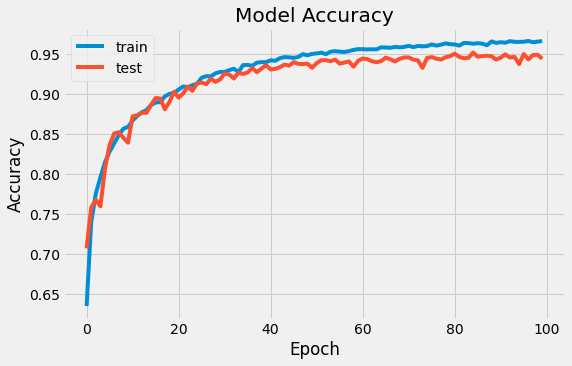

In [136]:
plt.figure(figsize=(8,5))
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

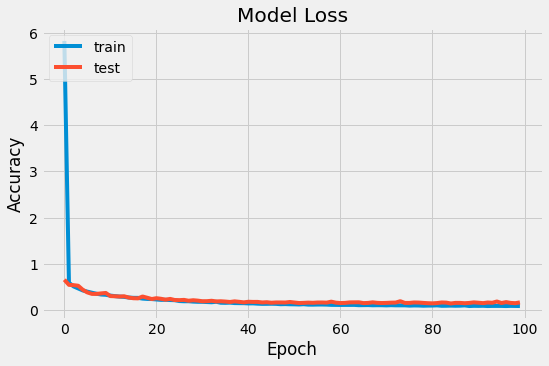

In [137]:
plt.figure(figsize=(8,5))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

#Breast Cancer Dataset

In [346]:
br_X = pd.DataFrame(br_X_arr)
br_y = pd.DataFrame(br_y_arr)

In [347]:
br_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [348]:
br_y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [349]:
br_X.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
dtype: object

In [350]:
br_X.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

In [351]:
sc = StandardScaler()
br_X = sc.fit_transform(br_X)

In [352]:
# le = LabelEncoder()
# br_y = le.fit_transform(br_y.values)

In [353]:
br_X_train, br_X_test, br_y_train, br_y_test = train_test_split(br_X, br_y, test_size=0.3, random_state=42)

In [354]:
print(br_X_train.shape, br_X_test.shape)
print(br_y_train.shape, br_y_test.shape)

(398, 30) (171, 30)
(398, 1) (171, 1)


In [405]:
nn = models.Sequential()

nn.add(layers.Dense(64, activation='relu', input_shape=(30,)))
nn.add(layers.Dropout(0.1))
nn.add(layers.Dense(32, activation='relu'))
nn.add(layers.Dense(1, activation='sigmoid'))

In [406]:
nn.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_231 (Dense)            (None, 64)                1984      
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_232 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_233 (Dense)            (None, 1)                 33        
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [407]:
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping('val_loss', mode='min', verbose=0, patience=150)
check = ModelCheckpoint('check.hdf5', monitor='val_loss', verbose=0, save_best_only=True, mode='min')
callbacks = [es,check]

In [408]:
results = nn.fit(br_X_train, br_y_train, validation_data=(br_X_test, br_y_test), epochs=150, callbacks=callbacks)

Epoch 1/150
13/13 [==============================] - 0s 12ms/step - loss: 0.4883 - accuracy: 0.8719 - val_loss: 0.3306 - val_accuracy: 0.9298
Epoch 2/150
13/13 [==============================] - 0s 5ms/step - loss: 0.2875 - accuracy: 0.9372 - val_loss: 0.2071 - val_accuracy: 0.9415
Epoch 3/150
13/13 [==============================] - 0s 5ms/step - loss: 0.2018 - accuracy: 0.9523 - val_loss: 0.1458 - val_accuracy: 0.9474
Epoch 4/150
13/13 [==============================] - 0s 5ms/step - loss: 0.1512 - accuracy: 0.9623 - val_loss: 0.1113 - val_accuracy: 0.9708
Epoch 5/150
13/13 [==============================] - 0s 5ms/step - loss: 0.1221 - accuracy: 0.9724 - val_loss: 0.0918 - val_accuracy: 0.9708
Epoch 6/150
13/13 [==============================] - 0s 5ms/step - loss: 0.1053 - accuracy: 0.9724 - val_loss: 0.0811 - val_accuracy: 0.9766
Epoch 7/150
13/13 [==============================] - 0s 5ms/step - loss: 0.0941 - accuracy: 0.9749 - val_loss: 0.0716 - val_accuracy: 0.9766
Epoch 8/150


In [409]:
model_saved = models.load_model('check.hdf5')

In [410]:
scores = model_saved.evaluate(br_X_test,br_y_test)
scores

6/6 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9883


[0.05005529895424843, 0.988304078578949]

### Plotting Learning Curves

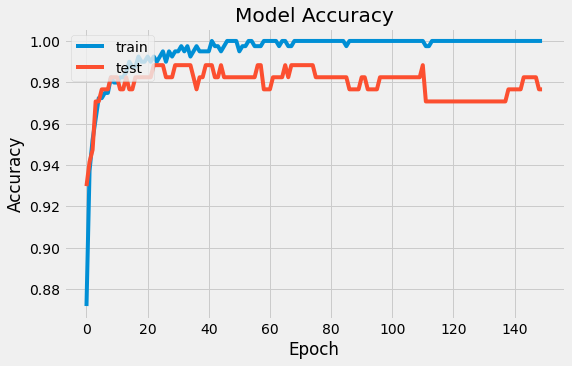

In [411]:
plt.figure(figsize=(8,5))
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

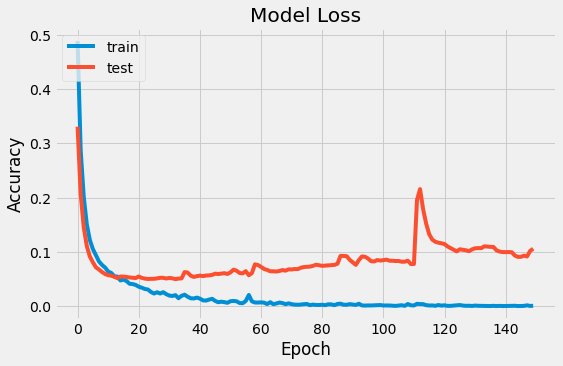

In [412]:
plt.figure(figsize=(8,5))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Wine

In [500]:
wine_X = pd.DataFrame(wine_X_arr)
wine_y = pd.DataFrame(wine_y_arr)

In [501]:
wine_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [502]:
wine_y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [503]:
wine_X.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object

In [504]:
wine_X.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [505]:
sc = StandardScaler()
wine_X = sc.fit_transform(wine_X)

In [506]:
wine_y = to_categorical(wine_y)

In [507]:
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_X, wine_y, test_size=0.05, random_state=42)

In [508]:
print(wine_X_train.shape, wine_X_test.shape)
print(wine_y_train.shape, wine_y_test.shape)

(169, 13) (9, 13)
(169, 3) (9, 3)


In [517]:
nn = models.Sequential()

nn.add(layers.Dense(12, activation='relu', input_shape=(13,)))
# nn.add(layers.Dropout(0.1))
nn.add(layers.Dense(6, activation='relu'))
nn.add(layers.Dense(3, activation='softmax'))

In [518]:
nn.summary()

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_286 (Dense)            (None, 12)                168       
_________________________________________________________________
dense_287 (Dense)            (None, 6)                 78        
_________________________________________________________________
dense_288 (Dense)            (None, 3)                 21        
Total params: 267
Trainable params: 267
Non-trainable params: 0
_________________________________________________________________


In [519]:
nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping('val_loss', mode='min', verbose=0, patience=150)
check = ModelCheckpoint('check.hdf5', monitor='val_loss', verbose=0, save_best_only=True, mode='min')
callbacks = [es,check]

In [520]:
results = nn.fit(wine_X_train, wine_y_train, validation_data=(wine_X_test, wine_y_test), epochs=50, callbacks=callbacks)

Epoch 1/50
6/6 [==============================] - 0s 23ms/step - loss: 1.0948 - accuracy: 0.5148 - val_loss: 1.0659 - val_accuracy: 0.4444
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0778 - accuracy: 0.5325 - val_loss: 1.0537 - val_accuracy: 0.4444
Epoch 3/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0627 - accuracy: 0.5680 - val_loss: 1.0427 - val_accuracy: 0.5556
Epoch 4/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0473 - accuracy: 0.5917 - val_loss: 1.0322 - val_accuracy: 0.5556
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0325 - accuracy: 0.6213 - val_loss: 1.0227 - val_accuracy: 0.5556
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0176 - accuracy: 0.6450 - val_loss: 1.0129 - val_accuracy: 0.5556
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0021 - accuracy: 0.7278 - val_loss: 1.0024 - val_accuracy: 0.6667
Epoch 8/50
6/6 [=================

In [521]:
model_saved = models.load_model('check.hdf5')

In [522]:
scores = model_saved.evaluate(wine_X_test,wine_y_test)
scores

1/1 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 1.0000


[0.033150121569633484, 1.0]

### Plotting Learning Curves

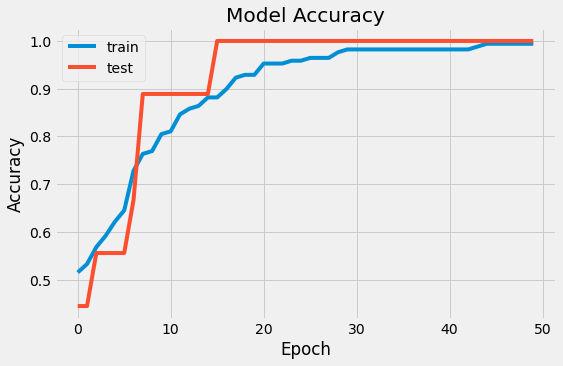

In [523]:
plt.figure(figsize=(8,5))
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

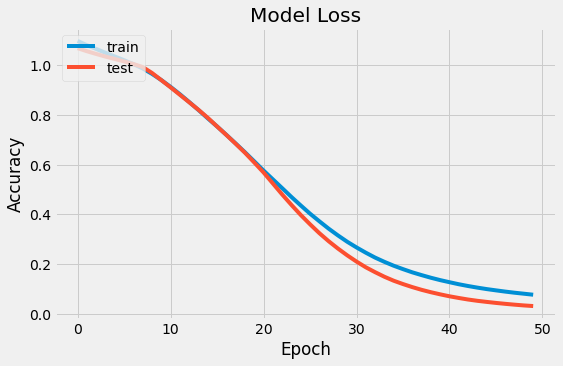

In [524]:
plt.figure(figsize=(8,5))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()